# High dimensional problems 

## 1) High dimensional problems in the regression context

"High dimensionality introduces two major problems in the context of regression: 

First, it reduces your prediction accuracy (i.e., increases your test error) because with a p that is almost as large as n, you are likely to overfit to your training data and then be way off when you apply the resulting model to test data.

Second, it increases the complexity of your model which makes inferring relationships between certain variables and Y much more difficult -- you can obtain a simpler, more interpretable model via feature selection or dimensionality reduction. "


## 2) Dealing with the curse of dimensionality

**Subset selection** Subset selection deals with the curse of dimensionality by examining a bias adjusted measure of model fit (AIC, BIC, Mallow's CP) for all possible combinations of predictors. For example, if we begin with a model with 5 predictors, subset selection will calculate the adjusted model fit for all $5!$ possible predictor combinations, plus the null, intercept-only model, and select the one with the best adjusted fit. This is a computationally intensive process most likely not suited to extremely high dimensional datasets.   <br>
**Shrinkage models (ridge regression and LASSO)** Ridge regression penalizes weak regression coefficients by minimizing their weights using a shrinkage penalty called the l2 norm, which scales the squared value of the regression coefficients. As a result, this functionally removes their influence on the residual sum of squares, but the coefficients never reach 0. As the shrinkage penalty increases (by tuning lambda), the magnitude of the estimated coeffecients decreases. In contrast, LASSO reduces the dimensionality of a model by actually removing weak predictors from the model. LASSO accomplishes this by using the L1 norm instead, which scales the absolute value of the regression coefficients, allowing them to reach zero and drop from the model altogether. <br>
**PCR** Principal Component Regression first projects your data $X$ into a new n x p matrix $Z$, where all variables in $Z$ are perfectly orthogonal to each other. Then it finds the $m$ components of $Z$ which explain the most variance in the data and uses $Z$ intead of the original predictors in a regression model. Increasing $m$ increases the flexibility (variance) of the model. 

## 3) The bias-variance tradeoff 

a) iii is the correct answer for LASSO. One assumption in LASSO is that at least one of the original factors (included in least squares) will have a coefficient of 0. This means that the model produced by LASSO will have a lower complexity than that produced by least squares regression.

b) iii is the correct answer for ridge regression. In ridge regression models, an l2-norm is applied such that we penalize the squared values of the coefficients. As such, the ββ's become smaller, which means that small coefficients are made even smaller (shrink toward zero) and have an even smaller impact on the variance. In other words, the model produced by ridge regression will have a lower complexity.

c) iii is the correct answer for principal component regression (PCR). Note that PCR is done on the components produced by PCA. Since PCA is an unsupervised learning method for the lower dimensional subspace of the data such that our X is best explained by a smaller set of variables that are orthogonal to one another. As such, the model produced by PCR has a lower complexity than that produced by least squared regression.



## ISLR 6.8

In [54]:
library(tidyverse)
#a) 
set.seed(042518)
x <- rnorm(100)
eps <- rnorm(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [11]:
#b) 
b0 <- 11
b1 <- 23
b2 <- 58
b3 <- 13

y <- b0 + b1*x + b2*(x^2) + b3 *(x^3) + eps

In [31]:
#c) 
library(leaps)
df <- data.frame(x,x^2, x^3, x^4, x^5, x^6, x^7, x^8, x^9, x^10, y)
nvmax = ncol(select(df, -y))
regfit.full = regsubsets(y ~., df, nvmax = nvmax)

In [63]:
reg.summary <- summary(regfit.full)
reg.summary$bic; reg.summary$adjr2; reg.summary$cp

[1] -114.9250 -431.5379 -949.4341 -946.3146 -941.7241 -937.5403 -932.9443
 [8] -928.4354 -923.8536 -919.3199

[1] 0.7080582 0.9881227 0.9999354 0.9999357 0.9999350 0.9999346 0.9999339
 [8] 0.9999333 0.9999325 0.9999318

[1]  4.195016e+05  1.680265e+04 -1.091195e+00 -4.317934e-01  1.555017e+00
 [6]  3.178497e+00  5.170317e+00  7.084470e+00  9.063659e+00  1.100000e+01

## ISLR 6.9

In [1]:
library(ISLR)
str(College)
attach(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [2]:
set.seed(1)
total_samples <- nrow(College)
train_prop <- .5
training_n_samples <- train_prop*total_samples
train_idx <- sample(total_samples, training_n_samples, replace = 0)
training_samples <- College[train_idx,]
test_samples <- College[-train_idx,]
head(training_samples); head(test_samples)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Fort Lewis College,No,3440,2823,1123,16,35,3793,486,6198,3320,500,2500,89,97,19.1,6,4362,46
Kansas State University,No,5880,4075,2833,25,55,14914,2246,6995,3120,600,2000,76,86,18.5,22,6122,54
Pacific University,Yes,943,849,288,41,71,1041,35,14210,3994,450,1100,76,76,10.9,22,11216,42
University of Wyoming,No,2029,1516,1073,23,46,7535,1488,5988,3422,600,1500,91,94,15.1,13,8745,45
D'Youville College,Yes,866,619,157,18,47,1074,336,8920,4310,680,1320,68,68,14.6,42,6898,46
University of Virginia,No,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [3]:
lm.fit = lm(Apps~., data=College)
#predict the value of the market 
lm.pred <- predict(lm.fit, test_samples)
summary(lm.fit)

In [3]:
paste0('lm test error:', (ls_test_err <- mean((lm.pred - test_samples$Apps)^2)))

ERROR: Error in mean((lm.pred - test_samples$Apps)^2): object 'lm.pred' not found


In [7]:
library(glmnet)
x = model.matrix(Apps~., College)[,-1]
y = College$Apps

Warning message:
“package ‘glmnet’ was built under R version 3.4.4”Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [8]:
x = model.matrix(Apps~., College)[,-1]
y = College$Apps
set.seed(1)
cv.out = cv.glmnet(x[train_idx,], y[train_idx], alpha=0)
plot(cv.out)
(bestlam = cv.out$lambda.min)

In [10]:
ridge.mod = glmnet(x[train_idx,], y[train_idx], alpha=0, lambda=bestlam)

In [28]:
#fit with bst lambda 
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[-train_idx,])
ridge_test_err <- mean((ridge.pred -y[-train_idx])^2)

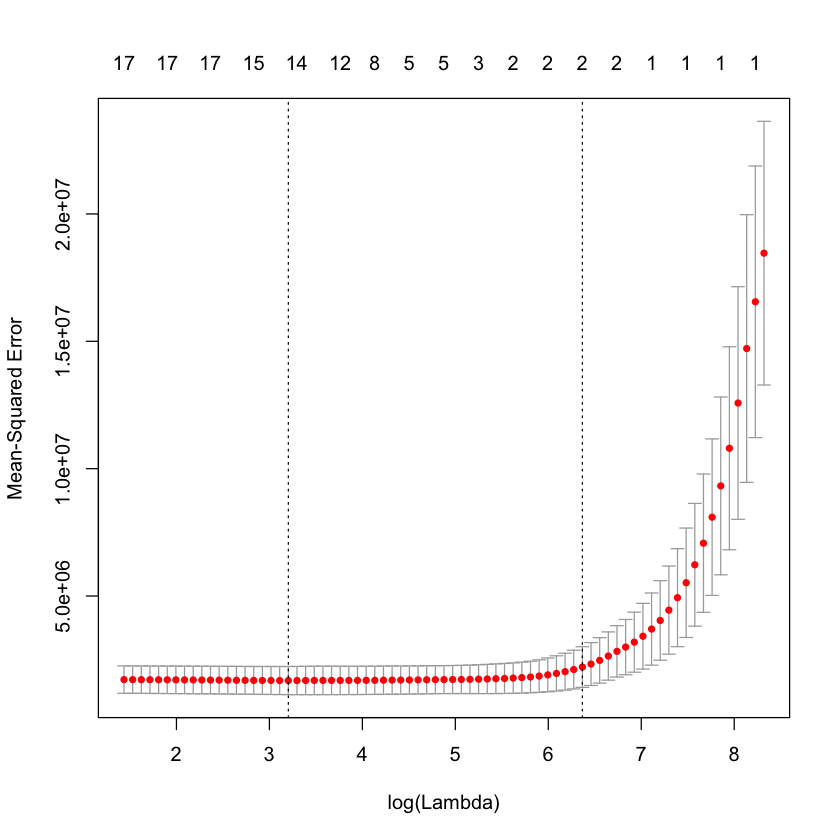

In [12]:
set.seed(1)
cv.lasso = cv.glmnet(x[train_idx,], y[train_idx], alpha=1)
plot(cv.lasso)
bestlam_lasso = cv.lasso$lambda.min

lasso.mod = glmnet(x[train_idx,], y[train_idx], alpha=1, lambda=bestlam_lasso)

In [13]:
lasso.pred <- predict(lasso.mod, s=bestlam_lasso, newx=x[-train_idx,])
lasso_test_err <- mean((lasso.pred - y[-train_idx])^2)

In [14]:
coefs <-predict(lasso.mod, type="coefficients", s=bestlam_lasso)
nnzero(coefs)

[1] 16

In [15]:
library(pls)
set.seed(2)
pcr.fit = pcr(Apps~., data=College, scale=TRUE, validation="CV")
summary(pcr.fit)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 777 17 
	Y dimension: 777 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3873     3837     2022     2028     1796     1584     1579
adjCV         3873     3837     2021     2028     1733     1576     1576
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1575     1539     1494      1484      1488      1488      1490
adjCV     1571     1533     1492      1482      1485      1485      1488
       14 comps  15 comps  16 comps  17 comps
CV         1489      1450      1162      1131
adjCV      1486      1437      1156      1125

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.670    57.30    64.30    69.90    75.39    80.38    83.99    87.40
Apps    2.316    73.06    73.07    82.08    84.08    84.11    84.32    85.1

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     4179     2364     2374     1996     1844     1845
adjCV         4335     4182     2360     2374     1788     1831     1838
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1850     1863     1809      1809      1812      1815      1825
adjCV     1844     1857     1801      1800      1804      1808      1817
       14 comps  15 comps  16 comps  17 comps
CV         1810      1823      1273      1281
adjCV      1806      1789      1260      1268

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.216    57.68    64.73    70.55    76.33    81.30    85.01    88.40
Apps    6.976    71.47    71.58    83.32    83.44    83.45    83.46    83.4

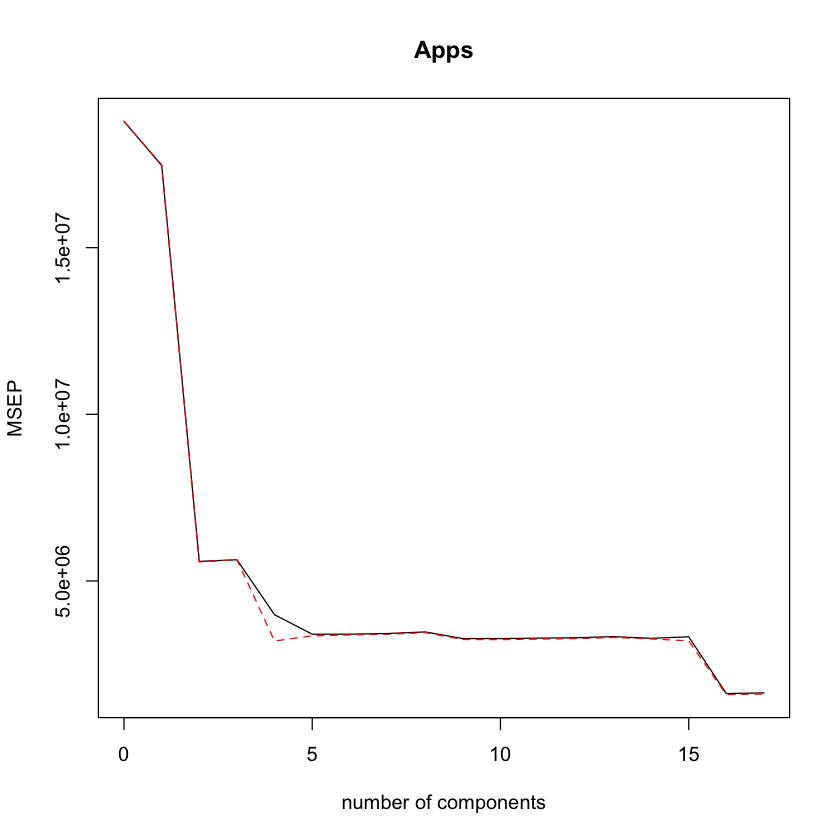

In [16]:
set.seed(1)
pcr.fit = pcr(Apps~., data=College, scale=TRUE, subset=train_idx, validation="CV")
validationplot(pcr.fit, val.type="MSEP")
summary(pcr.fit)

In [17]:
pcr.pred = predict(pcr.fit, x[-train_idx,], ncomp=17)
pcr_test_err <- mean((pcr.pred-y[-train_idx])^2)
#M=17

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     2176     1893     1725     1613     1406     1312
adjCV         4335     2171     1884     1715     1578     1375     1295
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1297     1285     1280      1278      1279      1282      1281
adjCV     1281     1271     1267      1265      1266      1269      1268
       14 comps  15 comps  16 comps  17 comps
CV         1281      1281      1281      1281
adjCV      1267      1267      1268      1268

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.91    43.08    63.26    65.16    68.50    73.75    76.10    79.03
Apps    76.64    83.93    87.14    91.90    93.49    93.85    93.91    

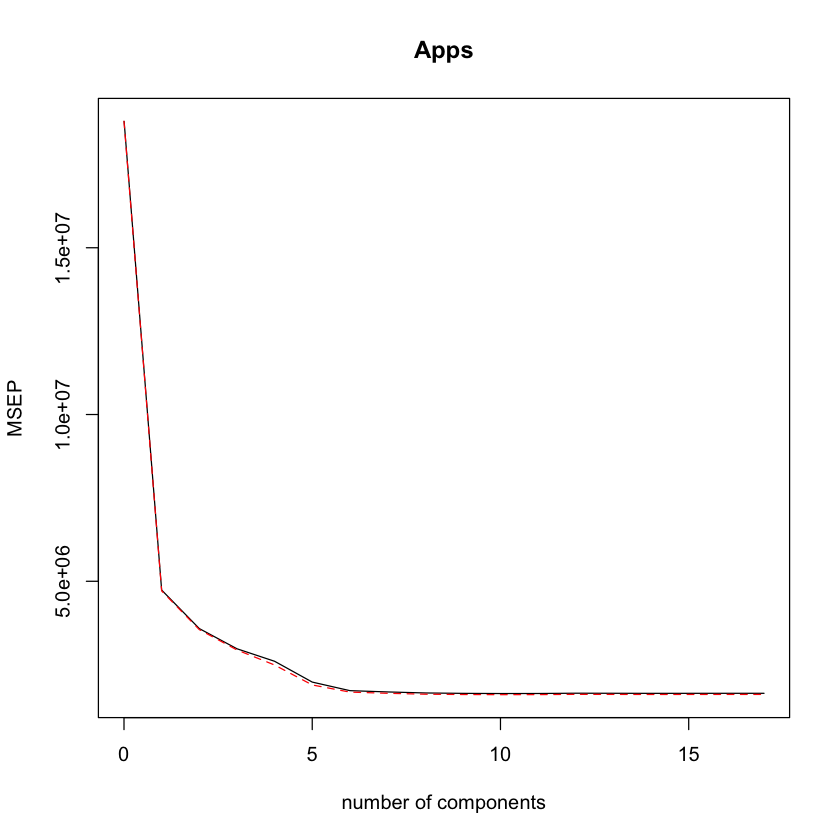

In [32]:
set.seed(1)
plsr.fit = plsr(Apps~., data=College, scale=TRUE, subset=train_idx, validation="CV")
validationplot(plsr.fit, val.type="MSEP")
summary(plsr.fit)

#~5 components. 

In [19]:
plsr.pred = predict(plsr.fit, x[-train_idx,], ncomp=8)
plsr_test_err <- mean((plsr.pred-y[-train_idx])^2)

In [4]:
(all_tst_err <- c(plsr_test_err, pcr_test_err, lasso_test_err,ridge_test_err,ls_test_err))

ERROR: Error in eval(expr, envir, enclos): object 'plsr_test_err' not found
